In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Data Upload

In [2]:
df= pd.read_excel("1.5 Mld (Outlet COD) - Copy.xlsx")
df

,STP_Inlet-COD_U,STP_Inlet-BOD_U,STP_Inlet-TSS_U,STP_Inlet-Total_nitrogen_U,STP_Inlet-Total Phosphorus_U,STP_Outlet-COD_U
0,170.4,64.4,108.6,67.0,6.3,56.7
1,170.2,64.3,108.7,76.8,6.1,57.1
2,175.6,65.0,113.4,64.6,5.7,57.7
3,173.2,63.3,112.2,83.1,6.1,58.4
4,170.6,61.6,111.5,52.3,5.0,58.6
...,...,...,...,...,...,...
355,259.8,143.2,160.8,2.9,6.8,41.1
356,266.3,143.3,170.9,6.7,6.8,41.4
357,280.7,142.0,202.6,6.7,6.9,41.5
358,287.9,138.7,220.5,4.3,6.5,41.7


# Data preparation

## Separation of data in X and Y

In [3]:
y= df['STP_Outlet-COD_U']
y

0      56.7
1      57.1
2      57.7
3      58.4
4      58.6
       ... 
355    41.1
356    41.4
357    41.5
358    41.7
359    42.1
Name: STP_Outlet-COD_U, Length: 360, dtype: float64

In [4]:
x= df.drop('STP_Outlet-COD_U', axis=1)
x

,STP_Inlet-COD_U,STP_Inlet-BOD_U,STP_Inlet-TSS_U,STP_Inlet-Total_nitrogen_U,STP_Inlet-Total Phosphorus_U
0,170.4,64.4,108.6,67.0,6.3
1,170.2,64.3,108.7,76.8,6.1
2,175.6,65.0,113.4,64.6,5.7
3,173.2,63.3,112.2,83.1,6.1
4,170.6,61.6,111.5,52.3,5.0
...,...,...,...,...,...
355,259.8,143.2,160.8,2.9,6.8
356,266.3,143.3,170.9,6.7,6.8
357,280.7,142.0,202.6,6.7,6.9
358,287.9,138.7,220.5,4.3,6.5


## Data splitting

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

### Training Data

In [6]:
x_train

,STP_Inlet-COD_U,STP_Inlet-BOD_U,STP_Inlet-TSS_U,STP_Inlet-Total_nitrogen_U,STP_Inlet-Total Phosphorus_U
310,229.6,128.4,141.5,1.7,6.6
239,197.8,71.0,154.5,13.7,6.7
60,169.7,61.4,111.3,35.6,5.8
221,205.7,101.8,140.1,18.0,6.8
264,209.5,106.5,140.4,1.8,6.7
...,...,...,...,...,...
79,179.1,70.3,130.3,68.7,6.6
343,272.3,145.6,222.9,1.5,6.4
323,232.5,125.2,146.6,1.7,5.7
280,217.5,112.9,141.2,1.6,6.4


### Testing Data

In [7]:
x_test

,STP_Inlet-COD_U,STP_Inlet-BOD_U,STP_Inlet-TSS_U,STP_Inlet-Total_nitrogen_U,STP_Inlet-Total Phosphorus_U
234,200.6,104.6,133.9,3.1,5.6
75,176.4,67.4,129.1,92.2,6.6
339,242.6,134.4,149.1,1.5,5.3
88,179.3,70.8,130.9,70.5,6.4
152,183.8,79.7,130.8,6.4,5.5
...,...,...,...,...,...
188,188.6,80.3,137.9,4.6,4.3
84,181.8,73.2,132.1,57.4,6.3
3,173.2,63.3,112.2,83.1,6.1
271,205.8,99.8,138.4,1.6,6.8


In [8]:
y_train

310    42.2
239    45.4
60     41.7
221    44.4
264    47.5
       ... 
79     42.0
343    39.1
323    49.5
280    45.6
8      59.7
Name: STP_Outlet-COD_U, Length: 288, dtype: float64

## Model Building

### Random Forest

### Training

In [9]:
rf= RandomForestRegressor( max_depth= 20, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, random_state=100)

### Prediction by model

In [10]:
y_rf_train_pred= rf.predict(x_train)
y_rf_test_pred= rf.predict(x_test)

### Evaluation of Model

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse= mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2= r2_score(y_train, y_rf_train_pred)

rf_test_mse= mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2= r2_score(y_test, y_rf_test_pred)

In [12]:
rf_test_r2

0.22204772288903285

In [13]:
import pandas as pd
rf_results= pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results

,0,1,2,3,4
0,Random Forest,1.714572,0.901009,16.217226,0.222048


### Results of Testing set

In [14]:
import pandas as pd
rf_results= pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results

,0,1,2,3,4
0,Random Forest,1.714572,0.901009,16.217226,0.222048


### Results of Training Set

In [15]:
rf_results.columns = ['Methods', 'Train MSE','Train R2', 'Test MSE', 'Test R2']
rf_results

,Methods,Train MSE,Train R2,Test MSE,Test R2
0,Random Forest,1.714572,0.901009,16.217226,0.222048


#### The lower the MSE, the better the model predictive accuracy, and, the better the regression model is.The greater the value of R-Squared, the better is the regression model.

In [16]:
import matplotlib.pyplot as plt
import numpy as num

Text(0, 0.5, 'Y_Test_Prediction')

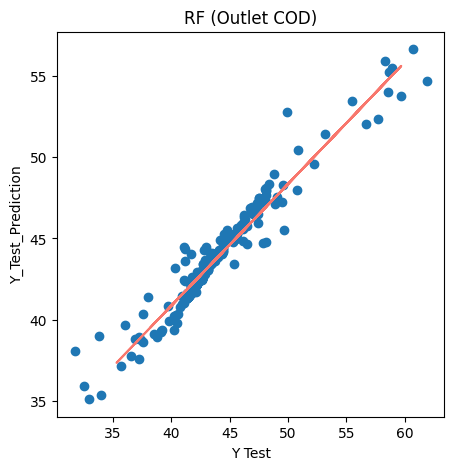

In [19]:
plt.figure(figsize=(5,5))
plt.title('RF (Outlet COD)')
plt.scatter (y=y_rf_train_pred, x=y_train, label='Original')



z= np.polyfit (y_train, y_rf_train_pred,1)
p= np.poly1d(z)

plt.plot(y_test, p(y_test), '#F8776D')
plt.xlabel('Y Test')
plt.ylabel('Y_Test_Prediction')

Text(0, 0.5, 'Y_Test_Prediction')

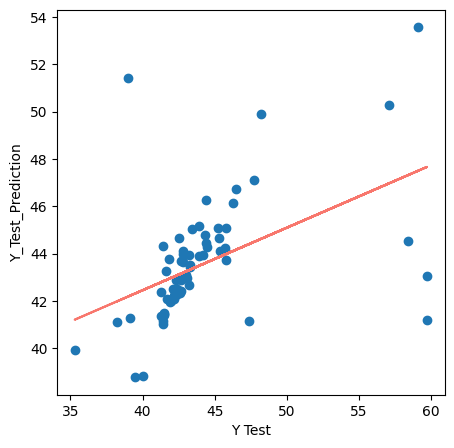

In [18]:
plt.figure(figsize=(5,5))

plt.scatter (y=y_rf_test_pred, x=y_test, label='Original')



z= np.polyfit (y_test, y_rf_test_pred,1)
p= np.poly1d(z)

plt.plot(y_test, p(y_test), '#F8776D')
plt.xlabel('Y Test')
plt.ylabel('Y_Test_Prediction')